In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.drop("User ID",axis=1,inplace=True)

In [5]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [6]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [9]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

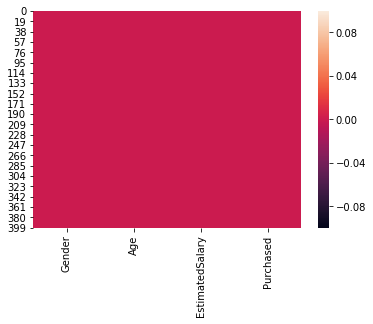

In [8]:
sns.heatmap(df.isnull())

In [10]:
dtc=DecisionTreeClassifier()

In [11]:
score=cross_val_score(dtc,x,y,cv=5)
score

array([0.75308642, 0.90123457, 0.825     , 0.75949367, 0.70886076])

In [12]:
score.mean()

0.7895350836068136

In [13]:
score.std()

0.06704308052663957

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=47)

In [47]:
#def metrics():
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print("Accuracy Score",accuracy_score(y_test,pred))
print("Classification Reports\n",classification_report(y_test,pred))
print("Confusion Matrix\n",confusion_matrix(y_test,pred))

Accuracy Score 0.8787878787878788
Classification Reports
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        78
           1       0.93      0.76      0.84        54

   micro avg       0.88      0.88      0.88       132
   macro avg       0.89      0.86      0.87       132
weighted avg       0.88      0.88      0.88       132

Confusion Matrix
 [[75  3]
 [13 41]]


In [48]:
#metrics()

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc=StandardScaler()

In [67]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [68]:
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print("Accuracy Score",accuracy_score(y_test,pred))
print("Classification Reports\n",classification_report(y_test,pred))
print("Confusion Matrix\n",confusion_matrix(y_test,pred))

Accuracy Score 0.8712121212121212
Classification Reports
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        78
           1       0.89      0.78      0.83        54

   micro avg       0.87      0.87      0.87       132
   macro avg       0.88      0.86      0.86       132
weighted avg       0.87      0.87      0.87       132

Confusion Matrix
 [[73  5]
 [12 42]]
